<p class="pull-left">
COMP 061 - Programming for Data Science
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

<div style="background-color: #FFF8C6; border:1px solid #000; margin-left: 2px; margin-right: 2px; 

padding-bottom: 2px; padding-left: 2px; padding-right: 1px; padding-top: 10px;">
<center><b><font size="6">Homework Week 4</font></b></center>
</div>

In [1]:
# Preparation for pandas and NumPy
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)

# Preparation for matplotlib
%matplotlib inline 

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Datasets: 
- `Rio 2016 US Olympic Team.xlsx`
- `Rio 2016 Olympic Athletes.xlsx`

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #ccc;"><b>Question 1:</b> 
Data Exploration</blockquote>

<b><font color="blue", size = 4>a)</font></b> Explore your data from both datasets in 10 steps and draw some conclusions on US athletes regarding the number of medals won. You can compare any field you like (e.g. gender, sports, colleges, majors, age range)

HINT: For this homework, it is a good idea to create a variable `total_medals`, so it is available when you need it

<span style="background-color: #FFFF00">Your answer here</span>

In [3]:
total_medals = pd.read_excel('Rio 2016 US Olympic Team.xlsx')
total_medals.shape

(555, 23)

In [4]:
athletes = pd.read_excel('Rio 2016 Olympic Athletes.xlsx')
athletes.shape

(11538, 14)

There are 11538 Athletes with 14 fields

In [5]:
athletes.columns

Index(['id', 'name', 'first', 'last', 'nationality', 'gender', 'dob', 'age', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze'], dtype='object')

In [6]:
athletes.sport.unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

In [7]:
athletes.sport.unique().shape

(28,)

There are 28 sports being played in the 2016 Rio Olympic Games

In [8]:
athletes.nationality.unique()

array(['ESP', 'KOR', 'CAN', 'MDA', 'NZL', 'AUS', 'USA', 'ETH', 'BRN',
       'IOA', 'GBR', 'UZB', 'RSA', 'EGY', 'MAR', 'QAT', 'SUD', 'ALG',
       'DEN', 'NED', 'DJI', 'SEN', 'CMR', 'ITA', 'NIG', 'SWE', 'GHA',
       'AFG', 'AZE', 'KSA', 'BAN', 'NGR', 'RUS', 'IND', 'HUN', 'KAZ',
       'BDI', 'ERI', 'POL', 'BRA', 'GEO', 'CZE', 'SEY', 'GAM', 'LTU',
       'IRI', 'ROU', 'CUB', 'SLO', 'BAH', 'ARG', 'PUR', 'FRA', 'RWA',
       'TOG', 'MDV', 'TUN', 'ISR', 'LAT', 'JOR', 'MAS', 'LIB', 'LBA',
       'PLE', 'IRQ', 'TUR', 'VEN', 'JPN', 'TPE', 'KGZ', 'CHN', 'MEX',
       'GRE', 'IRL', 'JAM', 'SUI', 'BAR', 'HON', 'ANG', 'GER', 'COL',
       'URU', 'MNE', 'SRB', 'BUL', 'FIN', 'UKR', 'BLR', 'SMR', 'COK',
       'SAM', 'AUT', 'BEL', 'KEN', 'SVK', 'POR', 'ECU', 'UAE', 'NAM',
       'GUY', 'EST', 'SKN', 'ARU', 'PAN', 'PER', 'TAN', 'FIJ', 'GUI',
       'NOR', 'ARM', 'THA', 'SIN', 'TKM', 'CRO', 'BIH', 'TGA', 'MAW',
       'DOM', 'GUA', 'MKD', 'TJK', 'CYP', 'CHI', 'MLT', 'ZIM', 'TTO',
       'CRC', 'BOL',

In [9]:
athletes.nationality.unique().shape

(207,)

There are 207 countries/nationalities participating in the 2016 Rio Olympic Games

In [10]:
DEN_athletes = athletes[athletes.nationality == 'DEN']
DEN_athletes[["first", "last", "age", "sport"]]

           first         last  age       sport
42          Abdi         Ulad   27   athletics
151       Agnete   Thinggaard   35  equestrian
531        Allan   Norregaard   37     sailing
576       Amalie   Dideriksen   22     cycling
578       Amalie      Thomsen   24       canoe
725       Anders         Dahl   42  equestrian
726       Anders      Nielsen   27    aquatics
777      Andreas         Bube   31   athletics
782      Andreas        Maxso   24    football
785      Andreas    Schilling   27   triathlon
874       Anette       Viborg   28     sailing
933         Anna       Moller   21   athletics
946         Anna     Kasprzak   29  equestrian
979         Anne     Andersen   26      rowing
983         Anne   Baumeister   31   athletics
984         Anne      Thomsen   35      rowing
989         Anne       Rindom   27     sailing
1003      Annika      Langvad   34     cycling
1043       Anton        Ipsen   24    aquatics
1183       Asger     Sorensen   22    football
1339     Barr

There are 128 Athletes from Denmark participating in the 2016 Rio Olympic Games.

In [11]:
athletes.groupby(athletes.nationality).size().sort_values(ascending = False)[0:20]

nationality
USA    567
BRA    485
GER    441
AUS    431
FRA    410
CHN    404
GBR    374
JPN    346
CAN    321
ESP    313
ITA    312
RUS    286
NED    249
POL    242
ARG    223
KOR    213
NZL    208
UKR    205
SWE    164
HUN    154
dtype: int64

Hungary & Sweden have the least participating athletes in the 2016 Rio Olympic Games

In [12]:
athletes[athletes.age < 25].groupby(["age", "sport"]).size()

age  sport            
16   aquatics               8
17   aquatics               6
     table tennis           1
18   aquatics              23
     athletics              3
     fencing                1
     football               1
     gymnastics            11
     shooting               1
     table tennis           4
     weightlifting          1
19   aquatics              38
     archery                2
     athletics              8
     fencing                1
     football               2
     gymnastics            21
     modern pentathlon      1
     sailing                2
     shooting               4
     taekwondo              1
     weightlifting          2
20   aquatics              52
     archery                4
     athletics             24
     boxing                 2
     canoe                  2
     cycling                1
     equestrian             1
     fencing                1
                         ... 
23   weightlifting         17
     wrestling   

The youngest athletes is 16 playing the sport aquatics.

In [13]:
athletes[athletes.age >16].groupby(["age", "sport"]).size().sort_values(ascending = True)

age  sport        
118  sailing            1
42   badminton          1
     canoe              1
     fencing            1
     golf               1
     handball           1
     tennis             1
43   aquatics           1
     cycling            1
     football           1
     gymnastics         1
     rowing             1
23   triathlon          1
43   weightlifting      1
44   fencing            1
     rowing             1
     table tennis       1
23   equestrian         1
45   sailing            1
     tennis             1
46   archery            1
22   triathlon          1
46   handball           1
     rowing             1
     sailing            1
     tennis             1
47   cycling            1
     golf               1
     sailing            1
48   golf               1
                     ... 
36   athletics         60
28   rowing            60
31   aquatics          63
35   athletics         64
23   football          72
30   aquatics          72
29   aquatics      

The oldest is oddly 118 playing the sport "sailing".

In [14]:
tf = athletes[athletes.sport == "football"]
tf.groupby(["nationality", "sport", "weight"]).size()

nationality  sport     weight
ALG          football  60.0      3
                       62.0      1
                       65.0      5
                       68.0      1
                       70.0      3
                       72.0      1
                       75.0      6
                       79.0      1
                       80.0      1
ARG          football  65.0      1
                       66.0      1
                       69.0      1
                       70.0      4
                       71.0      2
                       72.0      1
                       73.0      1
                       74.0      1
                       75.0      1
                       76.0      2
                       77.0      1
                       78.0      1
                       79.0      1
                       80.0      2
                       82.0      1
AUS          football  54.0      1
                       55.0      2
                       56.0      1
                       58

In [15]:
Hockey_df = athletes[athletes.sport == "Hockey"]
for row in Hockey_df.groupby(["nationality", "sport"]).size().iteritems():
    print (row)

In [16]:
for index, my_item in Hockey_df.iterrows():
    print ("\n--------------------------------")
    print (color.RED + color.BOLD + "Name: " + color.END, my_item.last, ", ", my_item.first)
    print (color.RED + color.BOLD + "Position: "+ color.END, my_item.weight)
    print (color.RED + color.BOLD + "Height (inches): "+ color.END, my_item.height_in)
    print (my_item.nationality)

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #ccc;"><b>Question 2:</b> 
Plot</blockquote>

<b><font color="blue", size = 4>a)</font></b> Create a plot that depicts the performance of US athletes (regarding the number of medals won), you can try adding factors as age, gender, major, college, etc.

<span style="background-color: #FFFF00">Your answer here</span>

Text(0,0.5,'Gender')

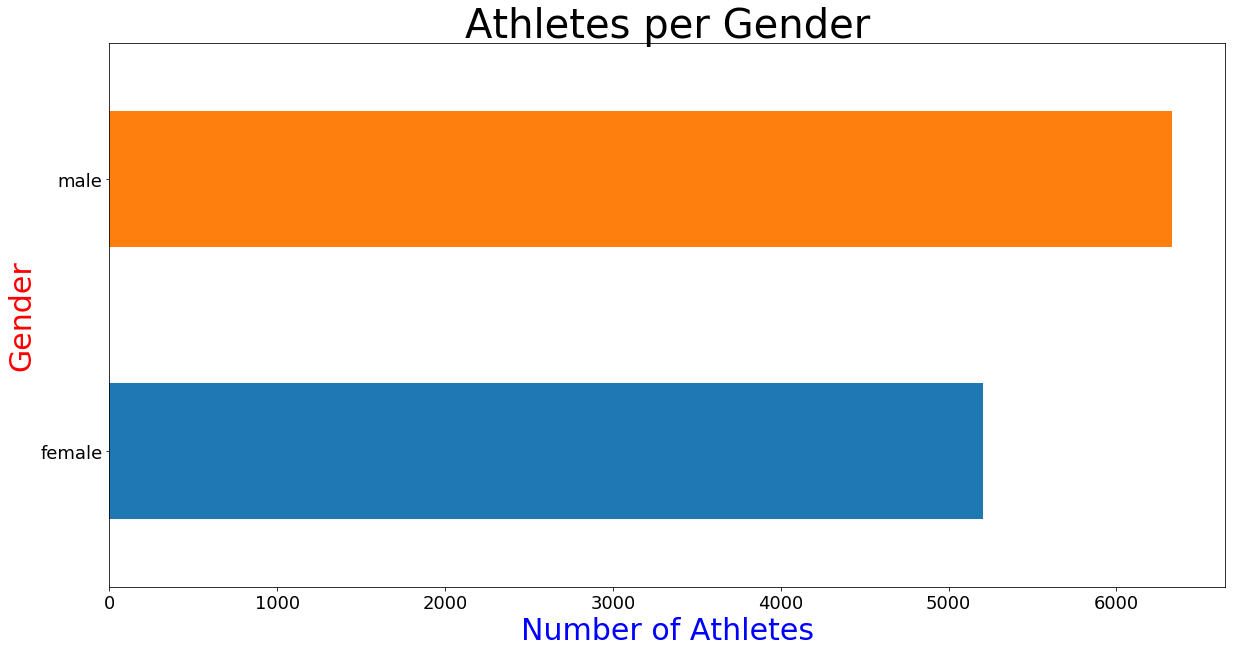

In [17]:
my_plot = athletes.groupby(["gender"]).size().plot(kind="barh", fontsize = 18, figsize = (20, 10))
my_plot.set_title("Athletes per Gender", fontsize = 40)
my_plot.set_xlabel("Number of Athletes", fontsize = 30, color = "blue")
my_plot.set_ylabel("Gender", fontsize = 30, color = "red")

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #ccc;"><b>Question 3:</b> 
Search</blockquote>

<b><font color="blue", size = 4>a)</font></b> Create a menu that prints all available colleges, lets the user to select one college, and then prints the athletes in that college with the number of medals each won.

<span style="background-color: #FFFF00">Your answer here</span>

In [18]:
total_medals = pd.read_excel('Rio 2016 US Olympic Team.xlsx')
total_medals.shape

(555, 23)

In [19]:
total_medals.columns

Index(['ID', 'FIRST_NAME', 'LAST_NAME', 'GENDER', 'SPORT', 'EVENT_OR_POSITION', 'OLYMPIC_EXPERIENCE', 'HEIGHT', 'HEIGHT_in', 'WEIGHT', 'DOB', 'DOB_Month', 'DOB-Day', 'DOB_Year', 'Age_as_of_Aug_5', 'BIRTH_CITY', 'BIRTH_STATE', 'HOMETOWN_CITY', 'HOMETOWN_STATE', 'CURRENT_RESIDENCE', 'CURRENT_STATE', 'COLLEGE', 'MAJOR'], dtype='object')

In [20]:
total_medals.COLLEGE.unique()

array(['Penn State University', 'Dartmouth College', 'Duke University',
       'University of Colorado', 'University of Washington',
       'Temple University', 'University of Wisconsin',
       'Stanford Univeristy', 'Cornell University',
       'University of California - Berkeley', 'University of Oklahoma',
       'University of the Pacific',
       'University of California - Los Angeles', 'University of Arkansas',
       'Oakton Community College', 'University of San Diego',
       'University of North Carolina', 'Kailua High School',
       'University of Georgia', 'University of Southern California',
       'Needham High School', 'Syracuse University', 'Purdue University',
       'University of Notre Dame', 'Saugus High School',
       'Coastal Carolina', 'Texas A&M University',
       'Indiana State University', 'Arizona State University',
       'Brown University', 'University of Kansas', 'Harvard University',
       'Binghamton University', 'University of Kentucky',
       'N

In [21]:
def COLLEGEInList(COLLEGE_name):
    return (COLLEGE_name in total_medals_df.index.levels[0])

In [22]:
def printCOLLEGE():
    print ("---------------- COLLEGE ----------------")
    print ("\n".join(total_medals_df.index.levels[0]))

In [ ]:
print ("\n\n Welcome to our Data Store")
print ("a) List all college in data")
print ("b) Create a graph for a specific college")
print ("c) Show all data for a specific college")
print ("\n0) Exit")

option = input ("What is your college? ")

if option in ["b","c"]:
    while True:
        COLLEGE = input ("Enter College Name (0 to go back): ")
        if COLLEGE == "0":
            option = "0"
            break
        if COLLEGEInList(COLLEGE_name):
            break
        print (COLLEGE, "not in list. Try again")
if (option == "a"):
    printCOLLEGE()
if (option == "b"):
    print ("\n\n ---------------", COLLEGE)
    total_medals_df.loc[COLLEGE].plot(kind="bar")
    plt.show()                  
    print ("\n\n ---------------------------")
if (option == "c"):
    print ("\n\n ---------------", COLLEGE)
    print(total_medals_df.loc[COLLEGE])
    print ("\n\n ---------------------------")



 Welcome to our Data Store
a) List all college in data
b) Create a graph for a specific college
c) Show all data for a specific college

0) Exit


In [ ]:
my_plot = total_medals.groupby(["COLLEGE",]).size().plot(kind="bar", fontsize = 18, figsize = (90, 50))
my_plot.set_title("Athletes per Sport", fontsize = 40)
my_plot.set_xlabel("Number of Athletes", fontsize = 50, color = "blue")
my_plot.set_ylabel("Sport", fontsize = 30, color = "red")

<b><font color="blue", size = 4>b)</font></b> Create a search engine that allows the user to enter two inputs (e.g. country, sport) and it will print a formatted lists of all athletes meeting the criteria.

<span style="background-color: #FFFF00">Your answer here</span>

In [ ]:
def countryInList(country_name):
    return (country_name in total_medals_df.index.levels[0])

In [ ]:
def printCountries():
    print ("---------------- COUNTRIES ----------------")
    print ("\n".join(total_medals_df.index.levels[0]))

In [ ]:
print ("\n\n Welcome to our Data Store")
print ("a) List all countries in data")
print ("b) Create a graph for a specific country")
print ("c) Show all data for a specific country")
print ("\n0) Exit")

option = input ("What is your selection? ")

if option in ["b","c"]:
    while True:
        country = input ("Enter Country Name (0 to go back): ")
        if country == "0":
            option = "0"
            break
        if countryInList(country):
            break
        print (country, "not in list. Try again")
if (option == "a"):
    printCountries()
if (option == "b"):
    print ("\n\n ---------------", country)
    total_medals_df.loc[country].plot(kind="bar")
    plt.show()                  
    print ("\n\n ---------------------------")
if (option == "c"):
    print ("\n\n ---------------", country)
    print(total_medals_df.loc[country])
    print ("\n\n ---------------------------")